In [41]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

In [47]:
import thinkstats2
import pandas

In [42]:
import nsfg
import numpy as np
df = nsfg.ReadFemPreg()

In [43]:
import math

# Exercise 2-4

Compute Cohen's d for totalwgt_lb to see which babies are lighter/ heavier

In [34]:
def CohenEffectSize(grp1,grp2):
    diff = grp1.mean() - grp2.mean()
    
    var1 = grp1.var()
    var2 = grp2.var()
    n1, n2 = len(grp1), len(grp2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [35]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

In [39]:
print CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)

-0.0886729270726


We find that the difference in means between the weight of first borns and that of others is less than 1/10 of a standard deviation, which is quite a small difference.

# Exercise 3-1

Create a distribution of actual number of children under 18 in each household. Compare it to a biased sample distribution asking children to say how many children (incl. themselves) are in each household.

We anticipate that households with many children will be oversampled and households with fewer (or no) children will be under- (or not) sampled.

In [51]:
pmf = thinkstats2.Pmf(resp.numkdhh)

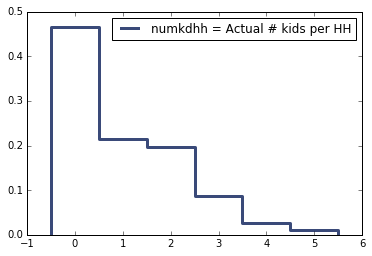

In [54]:
thinkplot.Pmf(pmf, label='numkdhh = Actual # kids per HH')
thinkplot.Show()

In [55]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [56]:
biased = BiasPmf(pmf, label='Biased')

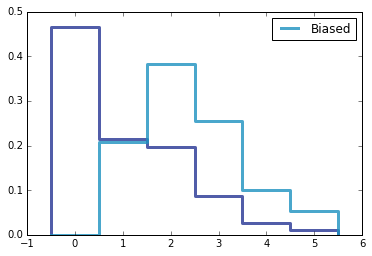

In [58]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show()

# Exercise 4-2

Examine the function that produces random numbers using pmf.

In [68]:
import random

In [69]:
rand_list = [random.random() for _ in range(1000)] #why doesn't np.random() work here?

/Users/ANTARES/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


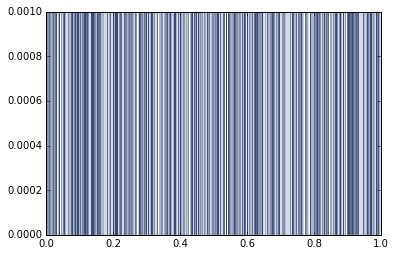

In [71]:
pmf = thinkstats2.Pmf(rand_list)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Show()

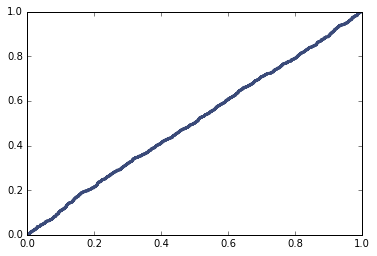

In [74]:
cdf = thinkstats2.Cdf(rand_list)
thinkplot.Cdf(cdf)
thinkplot.Show()

We would expect in the case of perfect random distribution that our PMF plot would converge on a uniform level of color, and that our CDF function would show a perfect linear relationship.

# Exercise 5-1

What percentage of the US Male population fits the height criteria for the Blue Man Group?

In [75]:
import scipy.stats #per hint

Mean of a Lognormal distribution is exp(mu + sigma^2 /2)

In [79]:
mu = 178 #cm
sigma = 7.7 #cm
distribution = scipy.stats.norm(loc=mu, scale=sigma)

In [80]:
distribution.mean(), distribution.std()

(178.0, 7.7000000000000002)

In [81]:
distribution.cdf(mu-sigma)

0.15865525393145741

In [86]:
short = distribution.cdf(177.8) #5'10"
tall = distribution.cdf(185.4) #6'1"

In [87]:
print np.round((tall-short)*100,2), "percent of US men qualify for BMG by height"

34.21 percent of US men qualify for BMG by height


# Bayesian (Elvis Presley twin)

Given we know Elvis had a twin brother, what is the probability that he was an *identical* twin?

H0 = Elvis is identical twin
H1 = Elvis is fraternal twin

We observe P(H0) = 0.33% and P(H1) = 0.8%

In [113]:
p_H0 = float(1000/300)
p_H1 = float(1000/125)

In [115]:
print p_H0, p_H1 #why are my sigfigs all messed up?

3.0 8.0


In [116]:
p_brother_given_H0 = 1
p_brother_given_h1 = .5

In [118]:
bayes = p_H0 / p_H1

In [119]:
print bayes

0.375
